# Piotroski F-Score Strategy for Stock Selection

### 1. Get Historical Price & Financial Data of 200 Stocks in 6 Years with 1 Month Interval
- **Data Source**: 
  - The notebook begins by importing and loading historical price and financial data for 200 stocks.
  - This data spans a period of six years and is segmented into one-month intervals.
- **Data Cleaning**: 
  - The data undergoes cleaning to handle missing values, remove any inconsistencies, and ensure it is ready for analysis.
- **Data Transformation**: 
  - The notebook then transforms the data into a suitable format for subsequent analysis.
  - This includes converting dates, aligning data points, and possibly calculating additional financial metrics.

### 2. Function to Calculate Piotroski F-Score
- **Function Definition**: 
  - A function is defined to calculate the Piotroski F-Score for each stock.
  - This score is a financial metric used to determine the financial health of a company based on various accounting criteria.
- **Criteria Calculation**: 
  - The function evaluates several criteria such as profitability, leverage, liquidity, and operational efficiency.
  - Each criterion contributes to the overall F-Score.
- **Score Assignment**: 
  - The function assigns a score based on the calculated criteria, with a higher score indicating a healthier financial status.

### 3. Create Dataframe Containing Piotroski F-Score for All Stocks
- **Dataframe Initialization**: 
  - A new DataFrame is initialized to store the Piotroski F-Scores for all 200 stocks.
- **Score Calculation**: 
  - The previously defined function is applied to each stock to calculate its Piotroski F-Score.
- **Data Storage**: 
  - The calculated scores are stored in the DataFrame alongside other relevant financial data for each stock.
- **Verification**: 
  - The notebook includes steps to verify the correctness of the scores, possibly through summary statistics or sample checks.

### 4. Create Dataframe to Store Profit and Loss of Each Stock in Each Year
- **Profit and Loss Calculation**: 
  - The notebook calculates the annual profit and loss for each stock.
  - This is based on historical price data and possibly includes dividends and other financial events.
- **Dataframe Structure**: 
  - A DataFrame is created to store these profit and loss values, with each row representing a stock and each column representing a year.
- **Aggregation**: 
  - The annual profit and loss data might be aggregated to provide a clearer picture of performance over time.
- **Validation**: 
  - There are likely steps to validate these calculations, ensuring accuracy and consistency with historical data.

### 5. Dataframe to Backtest Strategy
- **Backtesting Framework**: 
  - A framework is set up to backtest the investment strategy using historical data.
  - This involves simulating trades based on predefined rules and assessing the strategy's performance.
- **Strategy Implementation**: 
  - The notebook implements the strategy, which may involve selecting stocks based on their Piotroski F-Scores and holding them for specific periods.
- **Performance Metrics**: 
  - Key performance metrics such as cumulative return, Sharpe ratio, and drawdown are calculated and stored in a DataFrame.
- **Result Analysis**: 
  - The results of the backtest are analyzed, often through visualizations such as plots of cumulative return and Sharpe ratio against the number of top stocks selected.

### Limitations
- **Data Availability**: Financial report data is limited to only three years.
- **Missing Data**: Due to missing data, the number of stocks reduced from 200 to approximately 100 after processing.
- **Date Selection**: The chosen date for post-release is January of the following year, which may not align precisely with the official financial report release dates of some stocks.
- **Applicability**: Research suggests Piotroski F-Score is more effective for small to medium-sized companies. However, due to data limitations, the stocks in this analysis include various types, potentially reducing strategy effectiveness.
- **Costs Exclusion**: The analysis does not account for transaction costs and other associated expenses.

### Conclusion
This notebook provides a comprehensive analysis of a stock selection strategy based on Piotroski F-Scores. It covers data preparation, score calculation, profit and loss analysis, and backtesting, with a focus on deriving actionable insights from historical financial data.

# 1. Get historical Price & Financial Data of 200 stocks in 6 Years with 1 month interval

Define Parameters for historical data retrieval

In [1]:
# time_loop_back = '10y' # loop back 10 years
time_loop_back = '6y' # loop back 4 years
interval = '1mo' # interval 1 month

# list 200 most valuable companies
tickers = [
    "AAPL", "MSFT", "AMZN", "GOOG", "GOOGL", "META", "TSLA", "BRK-B", "JPM", "JNJ",
    "V", "NVDA", "UNH", "HD", "PG", "MA", "DIS", "PYPL", "ADBE", "NFLX",
    "PFE", "INTC", "T", "CSCO", "KO", "VZ", "MRK", "ABT", "NKE", "MCD",
    "CRM", "WMT", "BMY", "TMO", "AMGN", "ORCL", "HON", "LLY", "IBM", "DHR",
    "TXN", "SBUX", "MMM", "CAT", "GE", "BA", "SPGI", "QCOM", "UPS", "GS",
    "BAC", "C", "XOM", "CVX", "WFC", "BABA", "TGT", "LOW", "MDT", "ABBV",
    "NEE", "COST", "LIN", "NOC", "LMT", "AVGO", "AMT", "PM", "TMUS", "RTX",
    "MS", "SCHW", "BLK", "DE", "UNP", "MO", "LRCX", "INTU", "SYK", "ISRG",
    "ADI", "AMD", "ZTS", "BKNG", "GILD", "FIS", "USB", "TJX", "NOW", "SYY",
    "CI", "FDX", "APD", "CB", "MMC", "DUK", "SO", "D", "PLD", "WM",
    "MDLZ", "TFC", "CME", "MMC", "PNC", "APD", "FCX", "FDX", "NSC", "RTN",
    "ITW", "HUM", "BK", "PSA", "PGR", "LHX", "MSI", "EXC", "PSX", "DG",
    "ECL", "AON", "CL", "CTVA", "EOG", "BAX", "DHI", "TRV", "EL", "AEP",
    "ADM", "CDNS", "CMI", "KMB", "NEM", "SHW", "DGX", "ROST", "ROP", "NUE",
    "OXY", "MNST", "AMAT", "EBAY", "BXP", "DTE", "TSN", "YUM", "ED", "PCAR",
    "PEG", "NDAQ", "A", "WBA", "EA", "VLO", "STT", "ANSS", "WMB", "AVB",
    "MTB", "SRE", "AWK", "ZBH", "STX", "GLW", "AJG", "CARR", "SYF", "PPL"
]

Function to get historical price data and financial data for a list of tickers.

In [2]:
# 1. Get Historical Data of 50 stocks
import yfinance as yf
import pandas as pd

def get_historical_data(tickers, time_loop_back='4y', interval='1mo'):
    """
    Retrieve historical price data and financial data for a list of tickers.

    Parameters:
    tickers (list): List of ticker symbols.
    time_loop_back (str): Period to look back for historical data (default is '4y').
    interval (str): Interval for historical data (default is '1mo').

    Returns:
    tuple: A tuple containing two dictionaries:
        - price_data: Dictionary with historical price data for each ticker.
        - financial_data: Dictionary with financial data (financials, cashflow, balance_sheet) for each ticker.
    """
    import yfinance as yf
    import pandas as pd

    # Create a dictionary to store historical data
    price_data = {}

    # Create a dictionary to store financial data (Financials, Cashflow, and Balance Sheet)
    financial_data = {}

    # Create a list to store tickers for which data is not available
    unavailable_tickers = []

    # Retrieve data for each ticker
    for ticker in tickers:
        # Get stock data
        stock = yf.Ticker(ticker)
        
        # Get Historical Price Data
        hist = stock.history(period=time_loop_back, interval=interval)
        price_data[ticker] = hist

        # Get historical Financials Data, Cashflow Data, and Balance Sheet Data
        financials = stock.financials
        cashflow = stock.cashflow
        balance_sheet = stock.balance_sheet

        # If no data is returned, add the ticker to the list of unavailable tickers
        if hist.empty:
            unavailable_tickers.append(ticker)
            continue

        # handle not matching data 
        if financials.shape[1] != cashflow.shape[1] or financials.shape[1]!= balance_sheet.shape[1]:
            # find the minimum shape among financials, cashflow, and balance sheet
            min_shape = min(financials.shape[1], cashflow.shape[1], balance_sheet.shape[1])
            # trim the data to match the minimum shape
            financials = financials.iloc[:, :min_shape]
            cashflow = cashflow.iloc[:, :min_shape]
            balance_sheet = balance_sheet.iloc[:, :min_shape]

        financial_data[ticker] = {
            'financials': financials,
            'cashflow': cashflow,
            'balance_sheet': balance_sheet
        }

        print('Got data for', ticker)
    
    # print the tickers for which data is not available
    if unavailable_tickers:
        print('Data not available for:', unavailable_tickers)

    return price_data, financial_data

Run to get historical price and financial data for 50 stocks in 10 years

In [3]:
# Get historical price data and financial data for the list of tickers ( 50 stocks )
price_data, financial_data = get_historical_data(tickers, time_loop_back)

Got data for AAPL
Got data for MSFT
Got data for AMZN
Got data for GOOG
Got data for GOOGL
Got data for META
Got data for TSLA
Got data for BRK-B
Got data for JPM
Got data for JNJ
Got data for V
Got data for NVDA
Got data for UNH
Got data for HD
Got data for PG
Got data for MA
Got data for DIS
Got data for PYPL
Got data for ADBE
Got data for NFLX
Got data for PFE
Got data for INTC
Got data for T
Got data for CSCO
Got data for KO
Got data for VZ
Got data for MRK
Got data for ABT
Got data for NKE
Got data for MCD
Got data for CRM
Got data for WMT
Got data for BMY
Got data for TMO
Got data for AMGN
Got data for ORCL
Got data for HON
Got data for LLY
Got data for IBM
Got data for DHR
Got data for TXN
Got data for SBUX
Got data for MMM
Got data for CAT
Got data for GE
Got data for BA
Got data for SPGI
Got data for QCOM
Got data for UPS
Got data for GS
Got data for BAC
Got data for C
Got data for XOM
Got data for CVX
Got data for WFC
Got data for BABA
Got data for TGT
Got data for LOW
Got da

RTN: No data found, symbol may be delisted


Got data for ITW
Got data for HUM
Got data for BK
Got data for PSA
Got data for PGR
Got data for LHX
Got data for MSI
Got data for EXC
Got data for PSX
Got data for DG
Got data for ECL
Got data for AON
Got data for CL
Got data for CTVA
Got data for EOG
Got data for BAX
Got data for DHI
Got data for TRV
Got data for EL
Got data for AEP
Got data for ADM
Got data for CDNS
Got data for CMI
Got data for KMB
Got data for NEM
Got data for SHW
Got data for DGX
Got data for ROST
Got data for ROP
Got data for NUE
Got data for OXY
Got data for MNST
Got data for AMAT
Got data for EBAY
Got data for BXP
Got data for DTE
Got data for TSN
Got data for YUM
Got data for ED
Got data for PCAR
Got data for PEG
Got data for NDAQ
Got data for A
Got data for WBA
Got data for EA
Got data for VLO
Got data for STT
Got data for ANSS
Got data for WMB
Got data for AVB
Got data for MTB
Got data for SRE
Got data for AWK
Got data for ZBH
Got data for STX
Got data for GLW
Got data for AJG
Got data for CARR
Got data for

# 2. Function to calculate Piotroski F-Score

Proprocess to balance financial data

In [4]:
# preprocess the financial data
for ticker in list(financial_data.keys()):
    # 1. drop the last column if shape[1] = 5
    if financial_data[ticker]['financials'].shape[1] == 5:
        financial_data[ticker]['financials'] = financial_data[ticker]['financials'].iloc[:, :-1]
        financial_data[ticker]['cashflow'] = financial_data[ticker]['cashflow'].iloc[:, :-1]
        financial_data[ticker]['balance_sheet'] = financial_data[ticker]['balance_sheet'].iloc[:, :-1]
        
    # 2. drop if 'current asset' is not available
    if 'Current Assets' not in financial_data[ticker]['balance_sheet'].index:
        del financial_data[ticker]
        del price_data[ticker]
        continue
    
    # 3. drop if 'Long Term Debt' is not available
    if 'Long Term Debt' not in financial_data[ticker]['balance_sheet'].index:
        del financial_data[ticker]
        del price_data[ticker]
        continue

    # 4. drop if ''Gross Profit' is not available
    if 'Gross Profit' not in financial_data[ticker]['financials'].index:
        del financial_data[ticker]
        del price_data[ticker]
        continue
    
# update the tickers list
tickers = list(financial_data.keys())

print('Number of stocks intially:', len(tickers))
print('Number of stocks after filtering:', len(list(financial_data.keys())))
print('Stocks:', list(financial_data.keys()))

Number of stocks intially: 143
Number of stocks after filtering: 143
Stocks: ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'GOOGL', 'META', 'TSLA', 'JNJ', 'V', 'NVDA', 'UNH', 'HD', 'PG', 'MA', 'DIS', 'PYPL', 'ADBE', 'NFLX', 'PFE', 'INTC', 'T', 'CSCO', 'KO', 'VZ', 'MRK', 'ABT', 'NKE', 'MCD', 'CRM', 'WMT', 'BMY', 'TMO', 'AMGN', 'ORCL', 'HON', 'LLY', 'IBM', 'DHR', 'TXN', 'SBUX', 'MMM', 'CAT', 'GE', 'BA', 'SPGI', 'QCOM', 'UPS', 'XOM', 'CVX', 'BABA', 'TGT', 'LOW', 'MDT', 'ABBV', 'NEE', 'COST', 'LIN', 'NOC', 'LMT', 'AVGO', 'AMT', 'PM', 'TMUS', 'RTX', 'BLK', 'DE', 'UNP', 'MO', 'LRCX', 'INTU', 'SYK', 'ADI', 'AMD', 'ZTS', 'GILD', 'FIS', 'TJX', 'NOW', 'SYY', 'FDX', 'APD', 'MMC', 'DUK', 'SO', 'D', 'PLD', 'WM', 'MDLZ', 'CME', 'FCX', 'NSC', 'ITW', 'PSA', 'LHX', 'MSI', 'EXC', 'PSX', 'DG', 'ECL', 'AON', 'CL', 'CTVA', 'EOG', 'BAX', 'DHI', 'EL', 'AEP', 'ADM', 'CDNS', 'CMI', 'KMB', 'NEM', 'SHW', 'DGX', 'ROST', 'ROP', 'NUE', 'OXY', 'AMAT', 'EBAY', 'BXP', 'DTE', 'TSN', 'YUM', 'ED', 'PCAR', 'PEG', 'NDAQ', 'A', 'WBA', '

In [5]:
def calculate_piotroski_f_score(financials, cashflow, balance_sheet):
    """
    Calculate the Piotroski F-Score for a given company's financial data.

    Parameters:
    financials (pd.DataFrame): The financials data.
    cashflow (pd.DataFrame): The cashflow data.
    balance_sheet (pd.DataFrame): The balance sheet data.

    Returns:
    pd.Series: The Piotroski F-Score for each period.
    """
    
    # 1. Positive net income
    positive_net_income = financials.loc['Net Income'] > 0 

    # 2. Positive operating cash flow
    positive_operating_cashflow = cashflow.loc['Operating Cash Flow'] > 0

    # 3. Positive return on assets (ROA)
    net_income = financials.loc['Net Income']
    total_assets = balance_sheet.loc['Total Assets']
    average_assets = (total_assets + total_assets.shift(1)) / 2
    return_on_assets = net_income / average_assets
    positive_roa = return_on_assets > 0

    # 4. Operating cash flow > Net income (đồng bộ nhãn trước khi so sánh)
    net_income_aligned = net_income.reindex(cashflow.columns)
    operating_cash_flow_greater_than_net_income = cashflow.loc['Operating Cash Flow'] > net_income_aligned

    # 5. Increasing ROA
    increasing_roa = return_on_assets.diff() > 0

    # 6. Positive change in long-term debt ratio
    long_term_debt = balance_sheet.loc['Long Term Debt']
    previous_long_term_debt = long_term_debt.shift(1)
    positive_change_long_term_debt_ratio = (long_term_debt < previous_long_term_debt)

    # 7. Increasing current ratio
    # current_assets = balance_sheet.loc['Total Current Assets']
    current_assets = balance_sheet.loc['Current Assets']
    # current_liabilities = balance_sheet.loc['Total Current Liabilities']
    current_liabilities = balance_sheet.loc['Current Liabilities']
    previous_current_assets = current_assets.shift(1)
    previous_current_liabilities = current_liabilities.shift(1)
    increasing_current_ratio = (current_assets / current_liabilities) > (previous_current_assets / previous_current_liabilities)

    # 8. No new shares issued
    new_shares_issued = balance_sheet.loc['Issuance of Capital Stock', :] if 'Issuance of Capital Stock' in balance_sheet.index else pd.Series([0]*len(balance_sheet.columns), index=balance_sheet.columns)
    no_new_shares_issued = new_shares_issued == 0

    # 9. Higher gross margin
    gross_margin = (financials.loc['Gross Profit'] / financials.loc['Total Revenue'])
    previous_gross_margin = gross_margin.shift(1)
    higher_gross_margin = gross_margin > previous_gross_margin

    # Calculate Piotroski F-Score
    piotroski_f_score = positive_net_income.astype(int) + positive_operating_cashflow.astype(int) + positive_roa.astype(int) + operating_cash_flow_greater_than_net_income.astype(int) + increasing_roa.astype(int) + positive_change_long_term_debt_ratio.astype(int) + increasing_current_ratio.astype(int) + no_new_shares_issued.astype(int) + higher_gross_margin.astype(int)

    # drop NaN values
    piotroski_f_score = piotroski_f_score.dropna()

    return piotroski_f_score

# 3.Create Dataframe Contains Piotroski F-Score for All Stocks

Function to calculate Piotroski F-Score for all stocks

In [6]:
def create_piotroski_f_score_dataframe(tickers, financial_data):
    """
    Create a DataFrame containing the Piotroski F-Score for all given tickers.

    Parameters:
    tickers (list): List of ticker symbols.
    financial_data (dict): Dictionary containing financial data for each ticker.

    Returns:
    pd.DataFrame: DataFrame containing the Piotroski F-Score for each ticker.
    """

    # Create a dictionary to store Piotroski F-Scores
    piotroski_f_scores = {}

    # Calculate Piotroski F-Score for each ticker
    for ticker in tickers:
        financials = financial_data[ticker]['financials']
        cashflow = financial_data[ticker]['cashflow']
        balance_sheet = financial_data[ticker]['balance_sheet']
        
        piotroski_f_score = calculate_piotroski_f_score(financials, cashflow, balance_sheet)
        piotroski_f_scores[ticker] = piotroski_f_score

    # Convert the dictionary to a DataFrame
    piotroski_f_score_df = pd.DataFrame(piotroski_f_scores)

    return piotroski_f_score_df

run to get Piotroski F-Score for all stocks

In [7]:
# Create DataFrame Contains Piotroski F-Score for All Stocks
df_piostroski_f_score = create_piotroski_f_score_dataframe(tickers, financial_data)

# print
display(df_piostroski_f_score.head(10))

,AAPL,MSFT,AMZN,GOOG,GOOGL,META,TSLA,JNJ,V,NVDA,...,WMB,AVB,SRE,AWK,ZBH,STX,GLW,AJG,CARR,PPL
2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
2020-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,6.0,7.0,7.0,6.0,6.0,5.0,NaN,NaN,...,7.0,7.0,7.0,7.0,4.0,NaN,6.0,8.0,6.0,7.0
2021-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


only get the stocks with Piotroski F-Score != NaN at 31-12 of each year

In [8]:
#  only get rows with the last day of the year
df_end_of_year = df_piostroski_f_score[(df_piostroski_f_score.index.month == 12) & (df_piostroski_f_score.index.day == 31)]

# remove columns with all NaN values
df_end_of_year = df_end_of_year.dropna(axis=1, how='all')

display(df_end_of_year)

,AMZN,GOOG,GOOGL,META,TSLA,JNJ,UNH,MA,PYPL,NFLX,...,ANSS,WMB,AVB,SRE,AWK,ZBH,GLW,AJG,CARR,PPL
2020-12-31,6.0,7.0,7.0,6.0,6.0,5.0,7.0,7.0,7.0,5.0,...,8.0,7.0,7.0,7.0,7.0,4.0,6.0,8.0,6.0,7.0
2021-12-31,9.0,9.0,9.0,8.0,5.0,8.0,7.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,8.0,7.0,8.0,7.0,7.0,6.0
2022-12-31,3.0,6.0,6.0,6.0,7.0,6.0,7.0,8.0,6.0,5.0,...,6.0,7.0,7.0,6.0,6.0,6.0,7.0,7.0,5.0,6.0
2023-12-31,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


Dataframe to store Top 10 stocks with highest Piotroski F-Score for each year

In [9]:
# initialize the list of top 10 stocks
df_top_10_piostroski_f_score = pd.DataFrame(df_end_of_year.index)

# declare top k stocks based on piostroski f score
n_top_stocks = 10

# define columns for the top 10 stocks ( top_1_stock, top_1_score, top_2_stock, top_2_score, ..., top_10_stock, top_10_score)
for i in range(1, n_top_stocks+1):
    df_top_10_piostroski_f_score[f'Top_{i}_Stock'] = ''
    df_top_10_piostroski_f_score[f'Top_{i}_Score'] = 0

# loop through each row in the DataFrame
for index, row in df_end_of_year.iterrows():
    # sort the row in descending order
    sorted_row = row.sort_values(ascending=False)
    # loop through the top 10 stocks
    for i in range(1, n_top_stocks+1):
        # get the ticker and score
        ticker = sorted_row.index[i-1]
        score = sorted_row.iloc[i-1]
        # update the DataFrame
        df_top_10_piostroski_f_score.at[index, f'Top_{i}_Stock'] = ticker
        df_top_10_piostroski_f_score.at[index, f'Top_{i}_Score'] = score

# drop first 4 rows and first column
df_top_10_piostroski_f_score = df_top_10_piostroski_f_score.iloc[4:, 1:]

# display DataFrame of top 10 stocks
display(df_top_10_piostroski_f_score)

,Top_1_Stock,Top_1_Score,Top_2_Stock,Top_2_Score,Top_3_Stock,Top_3_Score,Top_4_Stock,Top_4_Score,Top_5_Stock,Top_5_Score,Top_6_Stock,Top_6_Score,Top_7_Stock,Top_7_Score,Top_8_Stock,Top_8_Score,Top_9_Stock,Top_9_Score,Top_10_Stock,Top_10_Score
2020-12-31 00:00:00,TMUS,9.0,AON,9.0,AMGN,9.0,SHW,9.0,DTE,8.0,AMT,8.0,SO,8.0,LLY,8.0,KMB,8.0,VZ,8.0
2021-12-31 00:00:00,AMZN,9.0,INTC,9.0,NEM,9.0,AEP,9.0,CTVA,9.0,FCX,9.0,GOOG,9.0,PM,9.0,LMT,9.0,SPGI,9.0
2022-12-31 00:00:00,RTX,8.0,LHX,8.0,UPS,8.0,MA,8.0,INTC,8.0,LMT,8.0,PM,7.0,ED,7.0,DTE,7.0,OXY,7.0
2023-12-31 00:00:00,AMZN,4.0,GILD,4.0,AEP,4.0,EOG,4.0,CTVA,4.0,CL,4.0,AON,4.0,ECL,4.0,PSX,4.0,EXC,4.0


Due to 2023 data is very low Piostroski F-Score, I will remove 2023 data ( So Min Piostroski F-Score to Buy is 7 )

In [10]:
# drop row of 2023
df_top_10_piostroski_f_score = df_top_10_piostroski_f_score.drop(pd.Timestamp('2023-12-31'))

# display DataFrame of top 10 stocks
display(df_top_10_piostroski_f_score)

,Top_1_Stock,Top_1_Score,Top_2_Stock,Top_2_Score,Top_3_Stock,Top_3_Score,Top_4_Stock,Top_4_Score,Top_5_Stock,Top_5_Score,Top_6_Stock,Top_6_Score,Top_7_Stock,Top_7_Score,Top_8_Stock,Top_8_Score,Top_9_Stock,Top_9_Score,Top_10_Stock,Top_10_Score
2020-12-31 00:00:00,TMUS,9.0,AON,9.0,AMGN,9.0,SHW,9.0,DTE,8.0,AMT,8.0,SO,8.0,LLY,8.0,KMB,8.0,VZ,8.0
2021-12-31 00:00:00,AMZN,9.0,INTC,9.0,NEM,9.0,AEP,9.0,CTVA,9.0,FCX,9.0,GOOG,9.0,PM,9.0,LMT,9.0,SPGI,9.0
2022-12-31 00:00:00,RTX,8.0,LHX,8.0,UPS,8.0,MA,8.0,INTC,8.0,LMT,8.0,PM,7.0,ED,7.0,DTE,7.0,OXY,7.0


# 4. Create dataframe to store profit and loss of each stock in each year

In [11]:
# ignore the warning
import warnings
warnings.filterwarnings('ignore')

# use with price_data
# only keep row month = 1 of each year
price_data_month_1 = {}
for ticker in tickers:
    price_data_month_1[ticker] = price_data[ticker][price_data[ticker].index.month == 1]

# rewrite index to keep only year
for ticker in tickers:
    price_data_month_1[ticker].index = price_data_month_1[ticker].index.year

# loop through each ticker to calculate the return of price_data_month_1
for ticker in tickers:
    price_data_month_1[ticker]['Return_next_1_year'] = price_data_month_1[ticker]['Close'].pct_change()

# display(price_data_month_1['AAPL'].head())

# shift the return_next_1_year +2
for ticker in tickers:
    price_data_month_1[ticker]['Return_next_1_year'] = price_data_month_1[ticker]['Return_next_1_year'].shift(-2)

# drop 1st & last row ( only keep data corresponding with DataFrame of top 10 stocks with Piotroski F-Score)
for ticker in tickers:
    price_data_month_1[ticker] = price_data_month_1[ticker].iloc[1:-2]

# display shape of price_data_month_1
display(price_data_month_1['AAPL'].head())
display(price_data_month_1['AMZN'].head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return_next_1_year
Date,,,,,,,,
2020,72.059681,79.748743,71.210749,75.287582,2934370400,0.0,0.0,0.332658
2021,131.035594,142.390303,124.028441,129.504623,2240262000,0.0,0.0,-0.169657
2022,175.597048,180.642884,152.757479,172.585342,2108446000,0.0,0.0,0.285125


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return_next_1_year
Date,,,,,,,,
2020,93.750000,102.786003,90.766998,100.435997,1693966000,0.0,0.0,-0.066973
2021,163.500000,168.194504,154.300003,160.309998,1430578000,0.0,0.0,-0.310506
2022,167.550003,171.399994,135.352005,149.573502,1524654000,0.0,0.0,0.504897


# 5. Dataframe to Backtest Strategy

In [12]:
def calculate_returns_of_strategy(df_top_10, price_data, n_top_stocks):
    df_backtest = df_top_10.copy()

    # map return of each stock to the DataFrame of top 10 stocks
    for index, row in df_top_10.iterrows():
        # get the year
        year = index.year
        # loop through the top 10 stocks
        for i in range(1, n_top_stocks+1):
            # get the ticker
            ticker = row[f'Top_{i}_Stock']
            # get the return of the stock in the next year
            return_next_1_year = price_data[ticker].loc[year, 'Return_next_1_year']
            # update the DataFrame
            df_backtest.at[index, f'Top_{i}_Return'] = return_next_1_year

    # calculate the average return of the top 10 stocks
    df_backtest['Average_Return'] = df_backtest[[f'Top_{i}_Return' for i in range(1, n_top_stocks+1)]].mean(axis=1)

    # calculate the cumulative return
    df_backtest['Cumulative_Return'] = (1 + df_backtest['Average_Return']).cumprod()

    # print final cumulative return
    print('*'*50)
    print('Pick the top', n_top_stocks, 'stocks based on Piotroski F-Score')
    print('Final Cumulative Return:', df_backtest['Cumulative_Return'].iloc[-1] * 100 - 100, '%')
    print('*'*50)

    # metrics
    metrics= {
        'Cumulative_Return_%': df_backtest['Cumulative_Return'].iloc[-1] * 100 - 100,
        'Average_Return_%': df_backtest['Average_Return'].mean() * 100,
        'Standard_Deviation_%': df_backtest['Average_Return'].std() * 100,
        'Sharpe_Ratio': df_backtest['Average_Return'].mean() / df_backtest['Average_Return'].std()
    }

    return df_backtest, metrics

Execute Strategy with N-Top stocks with highest Piotroski F-Score

**************************************************
Pick the top 10 stocks based on Piotroski F-Score
Final Cumulative Return: 13.066957900645718 %
**************************************************


{'Cumulative_Return_%': 13.066957900645718,
 'Average_Return_%': 4.380259888017448,
 'Standard_Deviation_%': 8.02109565377232,
 'Sharpe_Ratio': 0.5460924638091571}

**************************************************
Pick the top 1 stocks based on Piotroski F-Score
Final Cumulative Return: -44.599881889691005 %
**************************************************
**************************************************
Pick the top 2 stocks based on Piotroski F-Score
Final Cumulative Return: -30.50392021915046 %
**************************************************
**************************************************
Pick the top 3 stocks based on Piotroski F-Score
Final Cumulative Return: -29.145208739943683 %
**************************************************
**************************************************
Pick the top 4 stocks based on Piotroski F-Score
Final Cumulative Return: -10.295784067589011 %
**************************************************
**************************************************
Pick the top 5 stocks based on Piotroski F-Score
Final Cumulative Return: 15.673725517705833 %
**************************************************
************

,Pick_Top_Stocks,Cumulative_Return_%,Average_Return_%,Standard_Deviation_%,Sharpe_Ratio
6,6,18.940619,6.165279,8.174264,0.754230
9,9,16.750392,5.509095,8.246662,0.668039
10,10,13.066958,4.380260,8.021096,0.546092
8,8,15.404383,5.204957,9.958851,0.522646
5,5,15.673726,5.399026,11.371532,0.474784
7,7,13.744666,4.737815,10.457585,0.453051
4,4,-10.295784,-2.782004,14.864160,-0.187162
2,2,-30.503920,-9.133705,23.971631,-0.381021
3,3,-29.145209,-9.785785,16.803692,-0.582359
1,1,-44.599882,-17.201105,12.621144,-1.362880


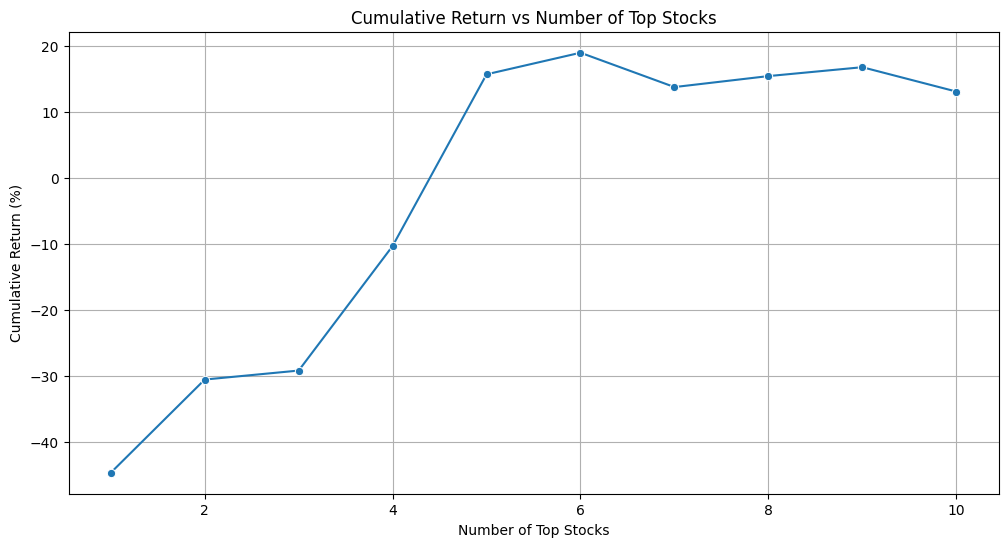

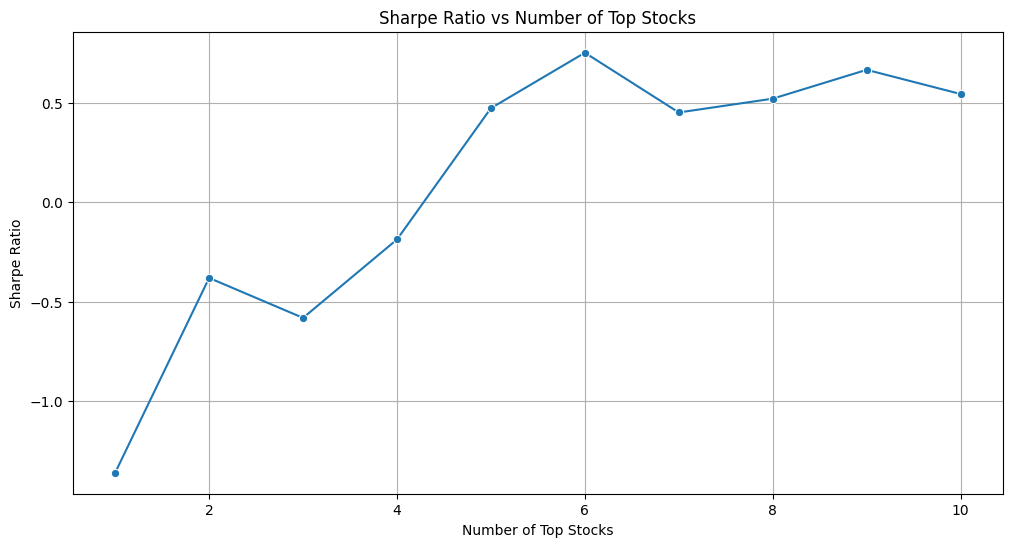

In [13]:
df_backtest,metrics = calculate_returns_of_strategy(df_top_10_piostroski_f_score, price_data_month_1, n_top_stocks)
display(metrics)

# define the range of top stocks
range_of_n_top_stocks = range(1, 11)

# run the backtest for each range of top stocks
results = []
for _ in range_of_n_top_stocks:
    temp_df_backtest, temp_metrics = calculate_returns_of_strategy(df_top_10_piostroski_f_score, price_data_month_1, _)
    results.append(temp_metrics)

# create a DataFrame from the results
df_results = pd.DataFrame(results, index=range_of_n_top_stocks)

# create columns containing the range of top stocks
df_results['Pick_Top_Stocks'] = df_results.index

# sort the DataFrame by Sharpe Ratio
df_results = df_results.sort_values(by='Sharpe_Ratio', ascending=False)

# put the 'Pick_Top_Stocks' column in the first position
cols = df_results.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_results = df_results[cols]

# display the results
display(df_results)

import matplotlib.pyplot as plt
import seaborn as sns

# plot the results ( cumulative return with number of top stocks)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_results, x='Pick_Top_Stocks', y='Cumulative_Return_%', marker='o')
plt.title('Cumulative Return vs Number of Top Stocks')
plt.xlabel('Number of Top Stocks')
plt.ylabel('Cumulative Return (%)')
plt.grid(True)
plt.show()


# plot the results ( sharpe ratio with number of top stocks)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_results, x='Pick_Top_Stocks', y='Sharpe_Ratio', marker='o')
plt.title('Sharpe Ratio vs Number of Top Stocks')
plt.xlabel('Number of Top Stocks')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()

